In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading the dataset
data = pd.read_excel("AnomaData.xlsx")

In [3]:
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


In [4]:
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [5]:
data.tail()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0
18397,1999-05-29 00:06:00,0,-0.840981,0.582710,0.593416,136.339880,0.228460,24.712960,-0.159185,0.048752,...,29.984624,-0.773514,2.686114,1.416690,-39.357199,-0.732044,0.012453,0.418993,-0.011214,0


Exploratory Data Analysis (EDA)

In [6]:
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

<bound method NDFrame.describe of                      time  y        x1        x2        x3          x4  \
0     1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756   13.497687   
1     1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359   16.230659   
2     1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147   14.127997   
3     1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612   13.161566   
4     1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150   15.267340   
...                   ... ..       ...       ...       ...         ...   
18393 1999-05-28 23:58:00  0 -0.877441  0.786430  0.406426  135.301215   
18394 1999-05-29 00:00:00  0 -0.843988  0.633086  0.561918  133.228949   
18395 1999-05-29 00:02:00  0 -0.826547  0.450126  0.334582  134.977973   
18396 1999-05-29 00:04:00  0 -0.822843  0.419383  0.387263  135.658942   
18397 1999-05-29 00:06:00  0 -0.840981  0.582710  0.593416  136.339880   

             x5         x6        x7        x8  ...        x51        x52  \


In [7]:
data.isnull()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.dropna(inplace=True)

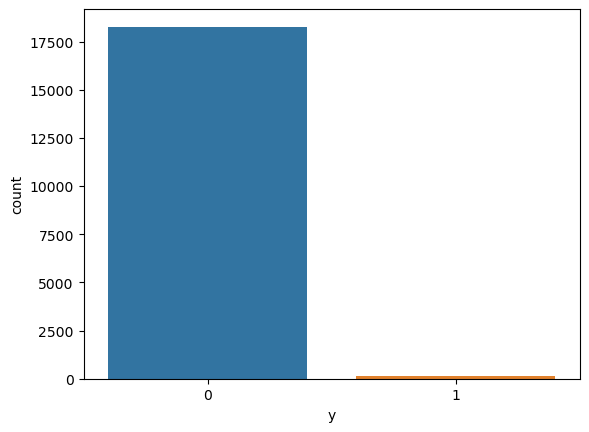

In [9]:
data.shape
sns.countplot(x='y',data=data)
plt.savefig('Countplot.png')
plt.show()

In [10]:
data.dtypes

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

In [11]:
# Correcting date datatype
data['time'] = pd.to_datetime(data['time'])

In [12]:
data.dtypes

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

In [13]:
# Feature Engineering and Selection
# Assuming no specific feature engineering required

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split 

# Define the feature matrix X
X = data
    
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Model 1: Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X_train)

# Predict outliers
y_pred_iforest_train = iforest.predict(X_train)
y_pred_iforest_test = iforest.predict(X_test)

In [17]:
import numpy as np

In [18]:
# Convert predictions to binary labels (1 for anomaly, -1 for normal)
y_pred_iforest_train_binary = np.where(y_pred_iforest_train == -1, 1, 0)
y_pred_iforest_test_binary = np.where(y_pred_iforest_test == -1, 1, 0)

In [19]:
# Step 8: Model Evaluation
# Evaluate the model using chosen metrics
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred_iforest_test_binary)
precision = precision_score(y_test, y_pred_iforest_test_binary)
recall = recall_score(y_test, y_pred_iforest_test_binary)
f1 = f1_score(y_test, y_pred_iforest_test_binary)
roc_auc = roc_auc_score(y_test, y_pred_iforest_test_binary)
    
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9
Precision: 0.014044943820224719
Recall: 0.22727272727272727
F1 Score: 0.026455026455026454
ROC AUC Score: 0.5656593270043244
